#  Adult Income Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set()

# 1. EDA

In [2]:
# Read the data
income_df = pd.read_csv('adult.csv')

In [3]:
# General Information
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# Data structure
income_df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# Convert income level to numerical data
income_df['income-num']=income_df['income'].map({'<=50K': 0, '>50K': 1})

In [7]:
# Separate numerical data from string data
cols_num =['age','fnlwgt','educational-num','capital-gain', 'capital-loss','hours-per-week', 'income-num']
cols_str = ['workclass', 'marital-status','occupation','relationship', 'race','gender','native-country','income']

# Find a way to automate this.

In [8]:
# Count the values of string data
for each_item in cols_str:
    print('VALUE COUNTS FOR', each_item.upper())
    print(income_df[each_item].value_counts())
    print()


VALUE COUNTS FOR WORKCLASS
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

VALUE COUNTS FOR MARITAL-STATUS
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

VALUE COUNTS FOR OCCUPATION
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name:

In [19]:
income_df["workclass"].mode().iloc[0]

'Private'

In [20]:
# Replace ? with most frequenct values
replace_cols = ['workclass','occupation', 'native-country']
for item in replace_cols:
    income_df[item] = np.where(income_df[item] == "?", 
                                  income_df[item].mode().iloc[0], 
                                  income_df[item])

# income_df["occupation"] = np.where(income_df["occupation"] == "?", 
#                                   income_df["workclass"].mode().iloc[0], 
#                                   income_df["workclass"])

# income_df["workclass"] = np.where(income_df["workclass"] == "?", 
#                                   income_df["workclass"].mode().iloc[0], 
#                                   income_df["workclass"])

In [21]:
# Lump countries other than United States to others 
income_df['native-country'] = np.where((income_df['native-country'] != 'United-States'),'Others',income_df['native-country'])

### Data Visualization

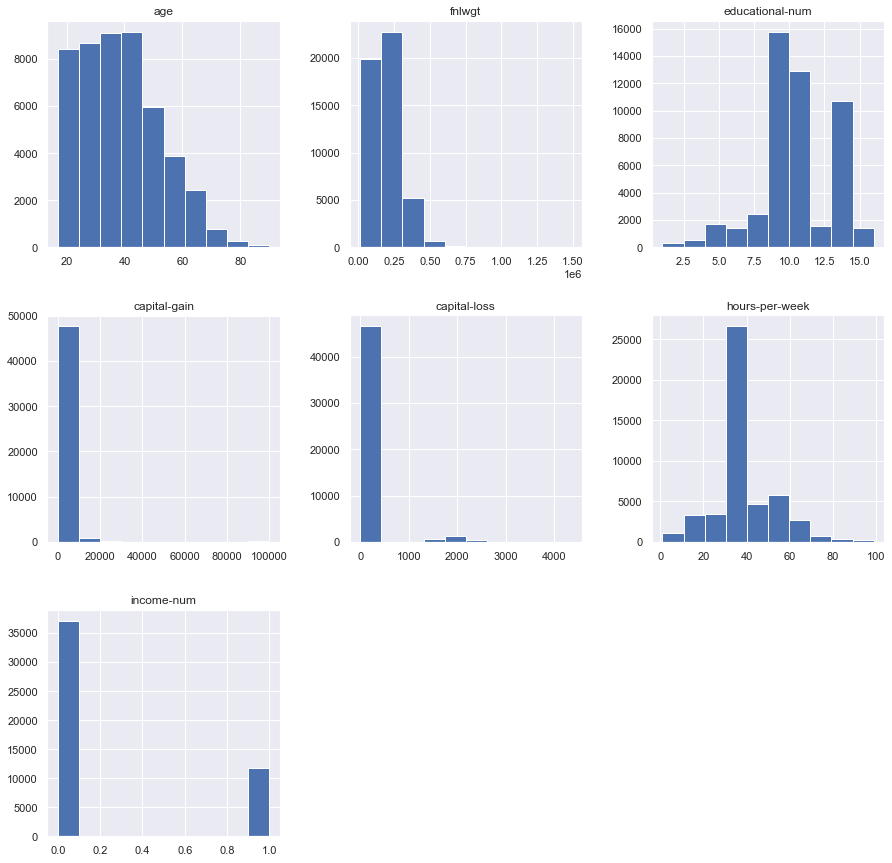

In [22]:
# Plot the histogram of numerical data

income_df.hist(figsize=(15, 15))
#sns.histplot(data = income_df)
plt.show()

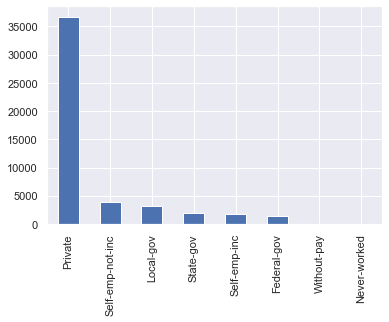

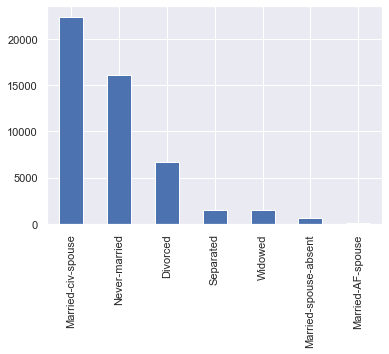

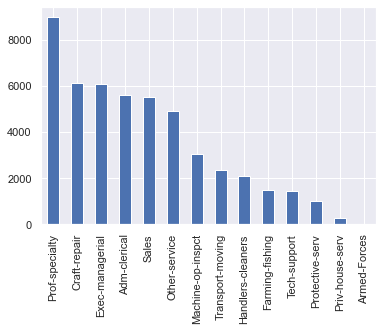

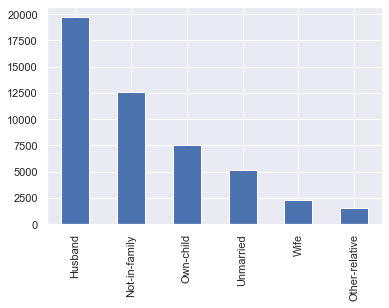

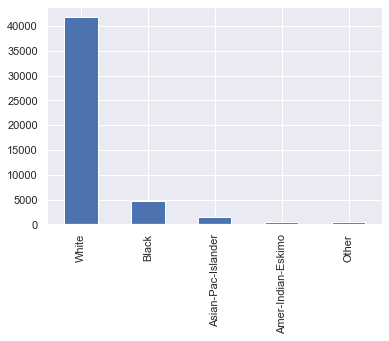

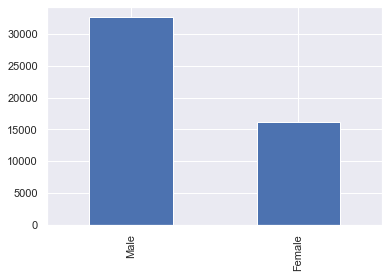

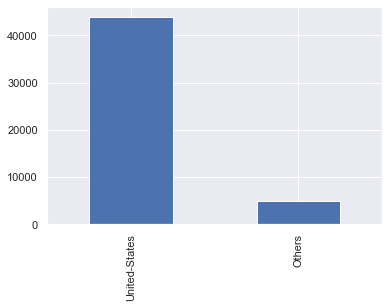

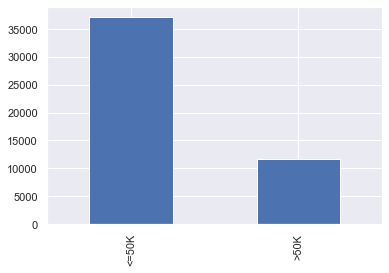

In [33]:
# PLot teh value counts of string data
for each_item in cols_str:
    plt.figure()
    income_df[each_item].value_counts().plot.bar()

<AxesSubplot:>

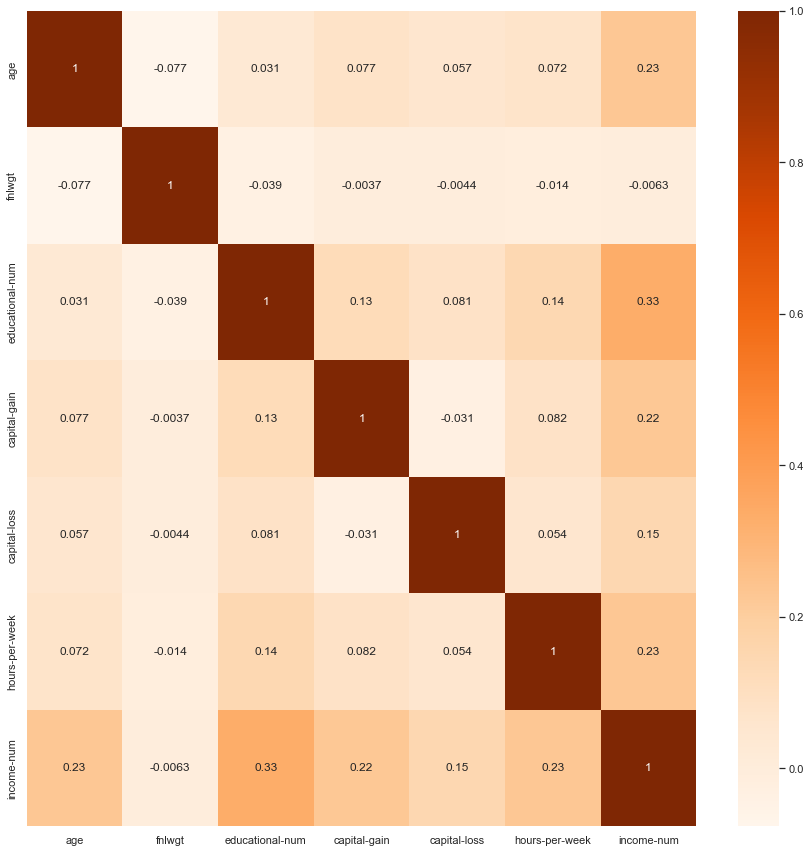

In [12]:
# calculate the correlation matrix of numerical data
corr = income_df.corr()

# plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr,cmap="Oranges", annot=True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Relationship between income and different variables

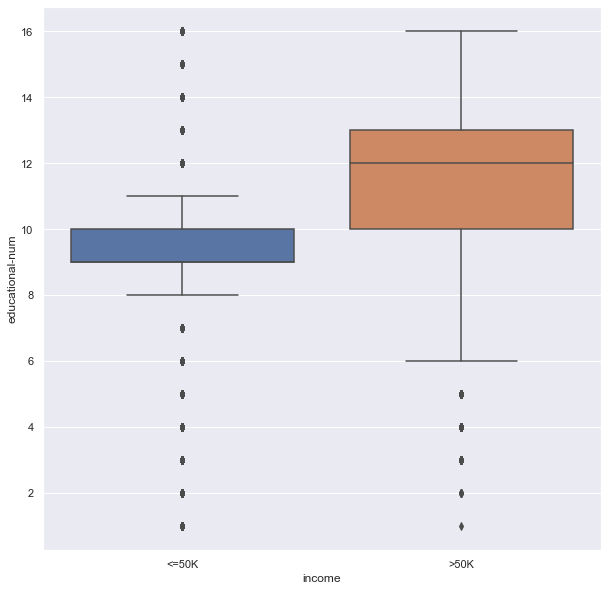

In [36]:
# Income and Age
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=income_df)
plt.show()

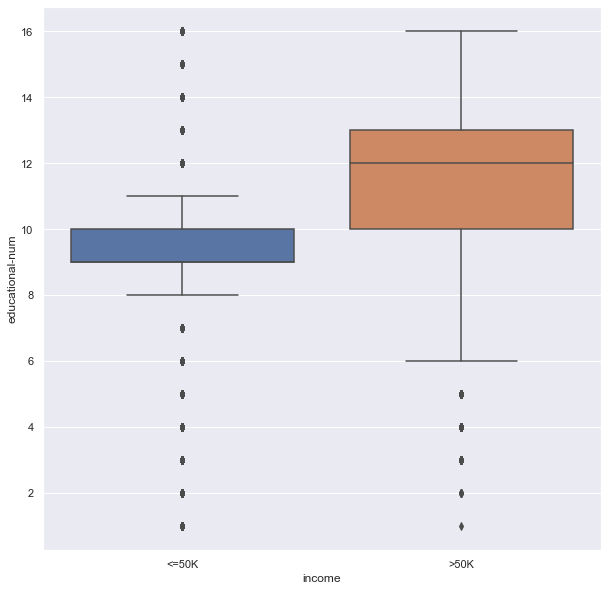

In [37]:
# Income and Education
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="educational-num", data=income_df)
plt.show()

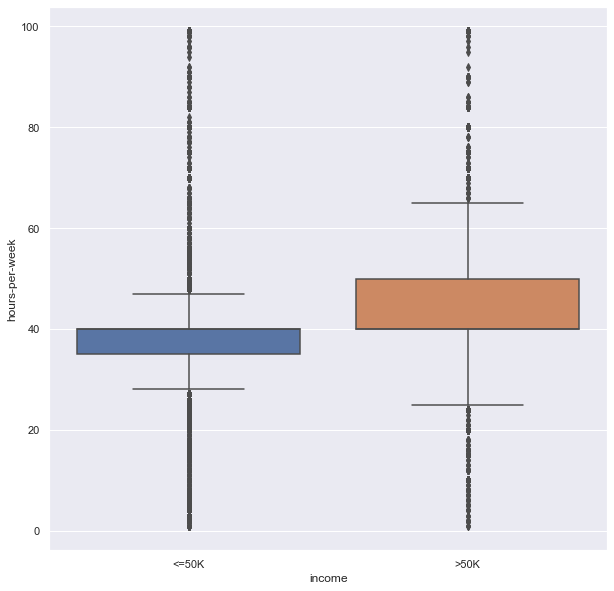

In [38]:
# Income and Hours worked
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=income_df)
plt.show()